In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# Read processed data

df = pd.read_csv('input/monthly_lst_measurements_warszawa.csv')

In [3]:
df.head()

,FILENAME,ACQUISITION TIME,DAY OR NIGHT,MIN TEMPERATURE,MAX TEMPERATURE,MEAN TEMPERATURE,STD OF TEMPERATURE
0,clipped_day_MOD11B3.A2000032.h19v03.006.201516...,2000-02-01,day,280.239990,283.239990,282.307983,0.839964
1,-1,-1,-1,280.239990,283.239990,282.307983,0.839964
2,clipped_day_MOD11B3.A2000061.h19v03.006.201516...,2000-03-01,day,277.019989,281.779999,279.126648,1.201174
3,clipped_day_MOD11B3.A2000092.h19v03.006.201516...,2000-04-01,day,296.059998,299.279999,297.433319,0.933201
4,clipped_day_MOD11B3.A2000122.h19v03.006.201516...,2000-05-01,day,298.019989,302.579987,300.953308,1.216894


In [4]:
# Sort data
sorted_df = df.sort_values(['ACQUISITION TIME', 'DAY OR NIGHT'])

In [5]:
sorted_df.head()

,FILENAME,ACQUISITION TIME,DAY OR NIGHT,MIN TEMPERATURE,MAX TEMPERATURE,MEAN TEMPERATURE,STD OF TEMPERATURE
1,-1,-1,-1,280.239990,283.239990,282.307983,0.839964
19,-1,-1,-1,299.799988,303.739990,301.830627,1.230908
220,-1,-1,-1,271.380005,277.259979,274.946655,1.374539
238,-1,-1,-1,290.299988,296.820007,292.562622,1.758485
0,clipped_day_MOD11B3.A2000032.h19v03.006.201516...,2000-02-01,day,280.239990,283.239990,282.307983,0.839964


In [6]:
# Delete all corrupted values

def get_year(s):
    year = s[:4]
    return int(year)

def get_month(s):
    month = s[5:7]
    return int(month)
    

processed_df = sorted_df[sorted_df['MIN TEMPERATURE'] > 0]
processed_df = processed_df[processed_df.FILENAME != '-1']
years_series = processed_df.apply(lambda val: get_year(val['ACQUISITION TIME']), axis = 1)
years_series.name = 'YEARS'
months_series = processed_df.apply(lambda val: get_month(val['ACQUISITION TIME']), axis = 1)
months_series.name = 'MONTHS'
full_df = pd.concat([processed_df, years_series, months_series], axis=1)
full_df.head()

,FILENAME,ACQUISITION TIME,DAY OR NIGHT,MIN TEMPERATURE,MAX TEMPERATURE,MEAN TEMPERATURE,STD OF TEMPERATURE,YEARS,MONTHS
0,clipped_day_MOD11B3.A2000032.h19v03.006.201516...,2000-02-01,day,280.239990,283.239990,282.307983,0.839964,2000,2
219,clipped_night_MOD11B3.A2000032.h19v03.006.2015...,2000-02-01,night,271.380005,277.259979,274.946655,1.374539,2000,2
2,clipped_day_MOD11B3.A2000061.h19v03.006.201516...,2000-03-01,day,277.019989,281.779999,279.126648,1.201174,2000,3
221,clipped_night_MOD11B3.A2000061.h19v03.006.2015...,2000-03-01,night,269.239990,273.040009,270.969330,1.019436,2000,3
3,clipped_day_MOD11B3.A2000092.h19v03.006.201516...,2000-04-01,day,296.059998,299.279999,297.433319,0.933201,2000,4


In [9]:
# Plot temperature indexes over time

def celsius(k):
    c = k - 273.15
    return c

p_mean = full_df[full_df['DAY OR NIGHT'] == 'day'].pivot("MONTHS", "YEARS", "MEAN TEMPERATURE")
p_mean = p_mean.apply(lambda x: celsius(x))
p_min = full_df[full_df['DAY OR NIGHT'] == 'day'].pivot("MONTHS", "YEARS", "MIN TEMPERATURE")
p_min = p_min.apply(lambda x: celsius(x))
p_max = full_df[full_df['DAY OR NIGHT'] == 'day'].pivot("MONTHS", "YEARS", "MAX TEMPERATURE")
p_max = p_max.apply(lambda x: celsius(x))
p_std = full_df[full_df['DAY OR NIGHT'] == 'day'].pivot("MONTHS", "YEARS", "STD OF TEMPERATURE")

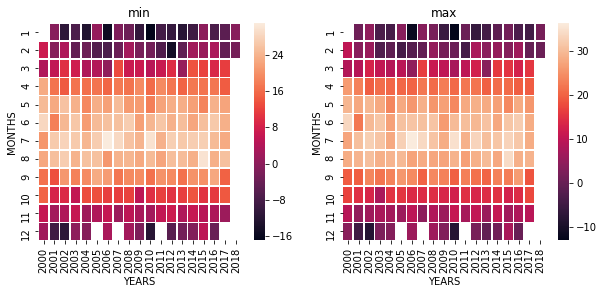

In [10]:
f1, (ax_min, ax_max) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.heatmap(p_min, linewidths=.5, ax=ax_min)
ax_min.set_title('min')
sns.heatmap(p_max, linewidths=.5, ax=ax_max)
ax_max.set_title('max')

plt.show()

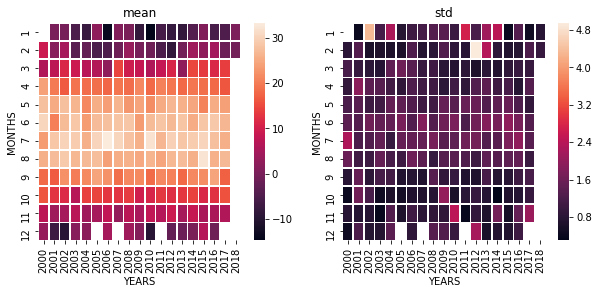

In [11]:
f2, (ax_mean, ax_std) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.heatmap(p_mean, linewidths=.5, ax=ax_mean)
ax_mean.set_title('mean')
sns.heatmap(p_std, linewidths=.5, ax=ax_std)
ax_std.set_title('std')
plt.show()

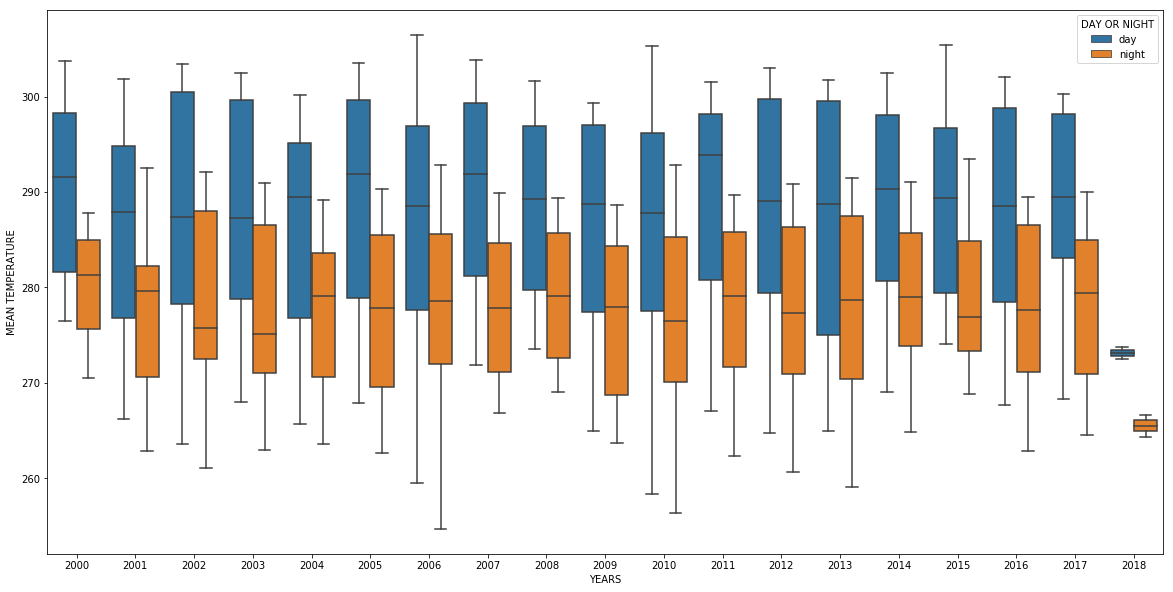

In [12]:
plt.figure(figsize=(20, 10))
ax_boxplot = sns.boxplot(data = full_df,
                        x = 'YEARS',
                        y = 'MEAN TEMPERATURE',
                        hue = 'DAY OR NIGHT')

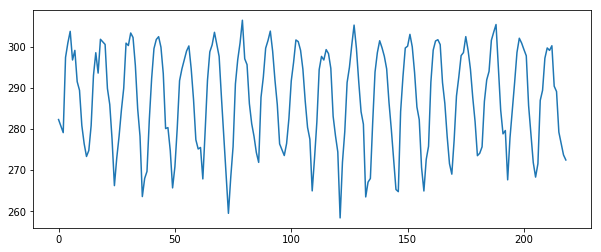

In [14]:
f3, ax = plt.subplots(figsize=(10, 4))
ax.plot(full_df['MEAN TEMPERATURE'][full_df['DAY OR NIGHT'] == 'day'])
plt.show()

In [15]:
# Mean temperature for each year

mean_series_day = full_df[full_df['DAY OR NIGHT'] == 'day'].groupby(by='YEARS')['MEAN TEMPERATURE'].mean()
mean_series_night = full_df[full_df['DAY OR NIGHT'] == 'night'].groupby(by='YEARS')['MEAN TEMPERATURE'].mean()

In [16]:
full_mean_day = mean_series_day[:-1]
full_mean_day = full_mean_day[2:]
full_mean_night = mean_series_night[:-1]
full_mean_night = full_mean_night[2:]

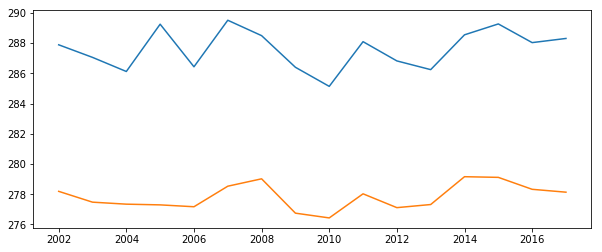

In [17]:
f4, ax = plt.subplots(figsize=(10, 4))
ax.plot(full_mean_day)
ax.plot(full_mean_night)
plt.show()

In [18]:
def trend(time_series, order=1):
    coeffs = np.polyfit(time_series.index.values, list(time_series), order)
    slope = coeffs[-2]
    return float(slope)

day_trend = trend(full_mean_day)
night_trend = trend(full_mean_night)

print(day_trend, night_trend)

0.04419828336719263 0.054668873431634644


In [19]:
day_set = (sorted_df[['ACQUISITION TIME', 'MEAN TEMPERATURE']][sorted_df['DAY OR NIGHT'] == 'day'])
night_set = (sorted_df[['ACQUISITION TIME', 'MEAN TEMPERATURE']][sorted_df['DAY OR NIGHT'] == 'night'])

In [20]:
night_set.head()

,ACQUISITION TIME,MEAN TEMPERATURE
219,2000-02-01,274.946655
221,2000-03-01,270.969330
222,2000-04-01,281.906647
223,2000-05-01,283.962616
224,2000-06-01,287.773315


In [21]:
day_set.to_csv('output/mean_temp_series_day.csv', index = False)
night_set.to_csv('output/mean_temp_series_night.csv', index = False)